In [1]:
import pandas as pd
from datetime import datetime, date, timedelta
import re
import numpy as np
import time
import sqlalchemy as sa

import locale
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

print(locale.getlocale())
%run '../serv_energy.py'

eng_co=sa.create_engine('sqlite+pysqlite:///cars.sqlite3') #, echo=True)

('ru_RU', 'UTF-8')


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rc
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib notebook

sns.set_style('whitegrid')

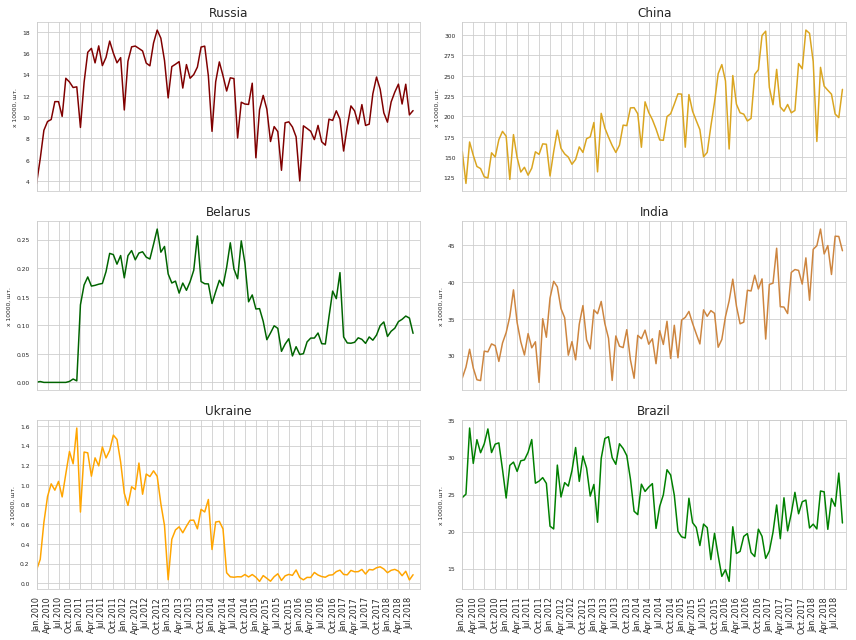

<Figure size 432x288 with 0 Axes>

In [3]:
iStartYear=2010
lKoef=1e4

xlim=(pd.Timestamp('{year}-01-01'.format(year=iStartYear)), 
      pd.Timestamp('{year}-{month}-01'.format(year=datetime.now().year, month=datetime.now().month-1)))


def prep_dtf(pdf, name=''):
    ret_pdf=pdf
    ret_pdf['date']= pd.to_datetime(ret_pdf['date'], format='%b-%Y')
    ret_pdf=ret_pdf[ret_pdf['date'].dt.year>=iStartYear]
    ret_pdf=ret_pdf.groupby(pd.Grouper(key='date', freq='M'))['Count'].sum()/lKoef
    ret_pdf.name=name
    return ret_pdf
    
def arrange_axes(ax_list, index_pdf, label_freq=3):
    ax_list[2].set_xlabel('', fontsize=8)
    for a in ax_list:
        a.set_xticks(ticks=index_pdf.index.tolist()[::label_freq])
    
    ax_list[2].set_xticklabels(index_pdf.index.strftime('%b.%Y')[::label_freq], rotation=90, fontsize=8)


def get_half_part(index_pdf, fig, gs, left=True):
    ax_list=[fig.add_subplot(gs[i, ~left]) for i in range(0, 3)]
    for a in ax_list:
        a.tick_params(axis='both', which='major', labelsize=6)
        #a.set_xticks(ticks=index_pdf.index.tolist()[::2])
        a.set_ylabel('x {:.0f}, шт.'.format(lKoef), fontsize=6)
        a.set_xlabel('', fontsize=8)

    for a in ax_list[1:]:
        a.get_shared_x_axes().join(ax_list[0], a)
        
    #ax_list[-1].set_xticklabels(index_pdf.index.strftime('%b.%Y')[::2], rotation=90, fontsize=8)
    return ax_list

russia=prep_dtf(pd.read_sql('production_ru', con=eng_co), name='Russia')
belarus=prep_dtf(pd.read_sql('production_belarus', con=eng_co))
ukraine=prep_dtf(pd.read_sql('production_ukraine', con=eng_co))

china=prep_dtf(pd.read_sql('production_china', con=eng_co))
india=prep_dtf(pd.read_sql('production_india', con=eng_co))
brazil=prep_dtf(pd.read_sql('production_brazil', con=eng_co))

figBR=plt.figure(figsize=(12, 9))
gsBR=gridspec.GridSpec(3, 2)

ax_gis=get_half_part(russia, figBR, gsBR, left=True)

russia.plot.line(ax=ax_gis[0], title='Russia', xlim=xlim, color='maroon')
belarus.plot.line(ax=ax_gis[1], title='Belarus', xlim=xlim, color='darkgreen')
ukraine.plot.line(ax=ax_gis[2], title='Ukraine', xlim=xlim, color='orange')

arrange_axes(ax_gis, russia)


ax_bri=get_half_part(china, figBR, gsBR, left=False)

china.plot.line(ax=ax_bri[0], title='China', xlim=xlim, color='goldenrod')
india.plot.line(ax=ax_bri[1], title='India', xlim=xlim, color='peru')
brazil.plot.line(ax=ax_bri[2], title='Brazil', xlim=xlim, color='green')

arrange_axes(ax_bri, china)

plt.tight_layout()
plt.show();

plt.savefig(r'/home/egor/Изображения/car_prods_gis_brick.png')

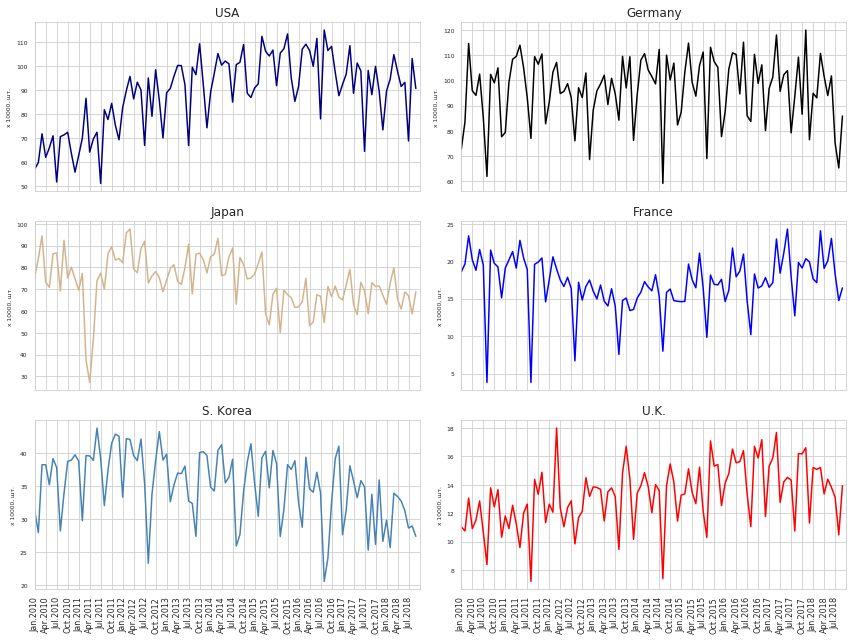

<Figure size 432x288 with 0 Axes>

In [4]:
usa=prep_dtf(pd.read_sql('production_usa', con=eng_co), name='usa')
japan=prep_dtf(pd.read_sql('production_japan', con=eng_co))
korea=prep_dtf(pd.read_sql('production_south_korea', con=eng_co))

ger=prep_dtf(pd.read_sql('production_germany', con=eng_co))
fra=prep_dtf(pd.read_sql('production_france', con=eng_co))
uk=prep_dtf(pd.read_sql('production_uk', con=eng_co))

figChem=plt.figure(figsize=(12, 9))
gsChem=gridspec.GridSpec(3, 2)

#ax_gis=[figBR.add_subplot(gs[i, 0]) for i in range(0, 3)]
ax_lc=get_half_part(usa, figChem, gsChem, left=True)

usa.plot.line(ax=ax_lc[0], title='USA', xlim=xlim, color='navy')
japan.plot.line(ax=ax_lc[1], title='Japan', xlim=xlim, color='tan')
korea.plot.line(ax=ax_lc[2], title='S. Korea', xlim=xlim, color='steelblue')

arrange_axes(ax_lc, usa)

#ax_bri=[figBR.add_subplot(gs[i, 1]) for i in range(0, 3)]
ax_rc=get_half_part(ger, figChem, gsChem, left=False)

ger.plot.line(ax=ax_rc[0], title='Germany', xlim=xlim, color='black')
fra.plot.line(ax=ax_rc[1], title='France', xlim=xlim, color='blue')
uk.plot.line(ax=ax_rc[2], title='U.K.', xlim=xlim, color='red')

arrange_axes(ax_rc, ger)

plt.tight_layout()
plt.show();

plt.savefig(r'/home/egor/Изображения/car_prods_great_prods.png')

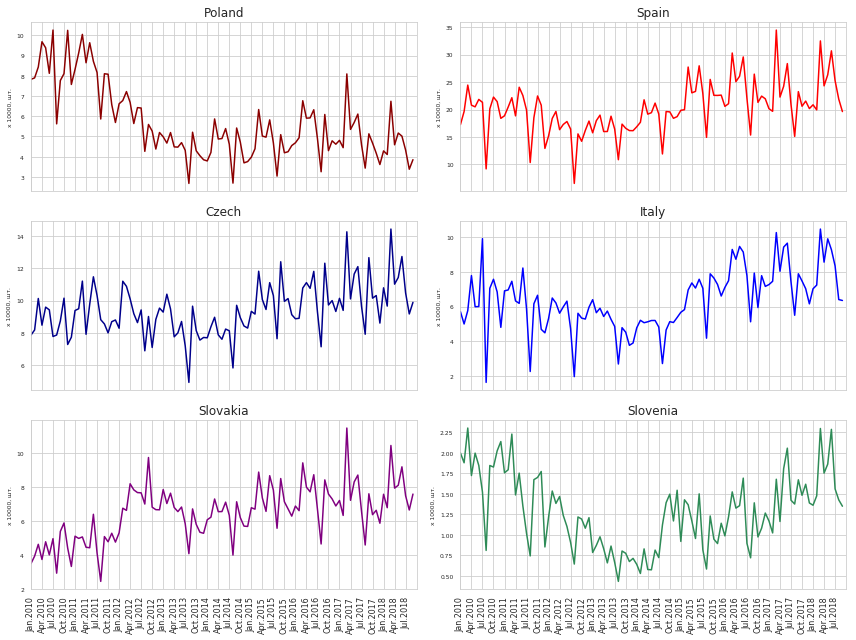

<Figure size 432x288 with 0 Axes>

In [5]:
poland=prep_dtf(pd.read_sql('production_poland', con=eng_co))
che=prep_dtf(pd.read_sql('production_czech', con=eng_co))
slo=prep_dtf(pd.read_sql('production_slovakia', con=eng_co))

spain=prep_dtf(pd.read_sql('production_spain', con=eng_co))
italy=prep_dtf(pd.read_sql('production_italy', con=eng_co))
sla=prep_dtf(pd.read_sql('production_slovenia', con=eng_co))

figSB=plt.figure(figsize=(12, 9))
gsSB=gridspec.GridSpec(3, 2)

ax_lsb=get_half_part(poland, figSB, gsSB, left=True)

poland.plot.line(ax=ax_lsb[0], title='Poland', xlim=xlim, color='darkred')
che.plot.line(ax=ax_lsb[1], title='Czech', xlim=xlim, color='darkblue')
slo.plot.line(ax=ax_lsb[2], title='Slovakia', xlim=xlim, color='purple')

arrange_axes(ax_lsb, poland)

ax_rsb=get_half_part(spain, figSB, gsSB, left=False)

spain.plot.line(ax=ax_rsb[0], title='Spain', xlim=xlim, color='red')
italy.plot.line(ax=ax_rsb[1], title='Italy', xlim=xlim, color='blue')
sla.plot.line(ax=ax_rsb[2], title='Slovenia', xlim=xlim, color='seagreen')

arrange_axes(ax_rsb, spain)

plt.tight_layout()
plt.show();

plt.savefig(r'/home/egor/Изображения/car_prods_sborka.png')

In [6]:
pdf_po=pd.read_sql('production_poland', con=eng_co)
print('Poland prods models: ', sorted(pdf_po['Model'].unique().tolist()))
print()
pdf_che=pd.read_sql('production_czech', con=eng_co)
print('Czech prods models: ', sorted(pdf_che['Model'].unique().tolist()))
print()
pdf_slo=pd.read_sql('production_slovakia', con=eng_co)
print('Slovakia prods models: ', sorted(pdf_slo['Model'].unique().tolist()))
print()
pdf_sla=pd.read_sql('production_slovenia', con=eng_co)
print('Slovenia prods models: ', sorted(pdf_sla['Model'].unique().tolist()))
print()
pdf_spa=pd.read_sql('production_spain', con=eng_co)
print('Spain prods models: ', sorted(pdf_spa['Model'].unique().tolist()))

Poland prods models:  ['Chevrolet', 'Fiat', 'Ford', 'Lancia', 'Opel', 'Volkswagen']

Czech prods models:  ['Citroen', 'Hyundai', 'Kia', 'Peugeot', 'Seat', 'Skoda', 'Toyota']

Slovakia prods models:  ['Audi', 'Citroen', 'Hyundai', 'Kia', 'Peugeot', 'Seat', 'Skoda', 'Volkswagen']

Slovenia prods models:  ['Renault', 'Smart']

Spain prods models:  ['Audi', 'Citroen', 'Ford', 'Iveco', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Volkswagen']


In [7]:
pdf_ru=pd.read_sql('production_ru', con=eng_co)
print('Russia prods models: ', sorted(pdf_ru['Model'].unique().tolist()))
print()
pdf_ukr=pd.read_sql('production_ukraine', con=eng_co)
print('Ukraine prods models: ', sorted(pdf_ukr['Model'].unique().tolist()))
print()
pdf_bel=pd.read_sql('production_belarus', con=eng_co)
print('Belarus prods models: ', sorted(pdf_bel['Model'].unique().tolist()))

Russia prods models:  ['BAW', 'BMW', 'Brilliance', 'Cadillac', 'Caterpillar', 'ChangAn', 'Chery', 'Chevrolet', 'Citroen', 'Daewoo', 'Datsun', 'Emgrand', 'FAW', 'Fiat', 'Ford', 'Foton', 'Geely', 'Genesis', 'Haima', 'Haval', 'Hawtai', 'Hyundai', 'Isuzu', 'Iveco', 'JAC', 'Kia', 'Komatsu', 'Lada', 'Lifan', 'Luxgen', 'MAN', 'MG', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Scania', 'SsangYong', 'Toyota', 'Volkswagen', 'Volvo', 'БЗКТ', 'Бронто', 'ВИС', 'Волжанин', 'ГАЗ', 'ГолАЗ', 'ЗИЛ', 'Иж', 'КаВЗ', 'КамАЗ', 'ЛиАЗ', 'НефАЗ', 'ПАЗ', 'ТагАЗ', 'Тонар', 'Тролза', 'УАЗ', 'Урал']

Ukraine prods models:  ['Chery', 'Chevrolet', 'Isuzu', 'Kia', 'Lada', 'Naza', 'Skoda', 'Tata', 'БАЗ', 'Богдан', 'ЗАЗ', 'КрАЗ', 'ЛАЗ', 'ЧАЗ']

Belarus prods models:  ['Geely', 'Intrall', 'IranKhodro', 'БелАЗ', 'МАЗ', 'МоАЗ']


In [8]:
pdf_bra=pd.read_sql('production_brazil', con=eng_co)
print('Brazil prods models: ', sorted(pdf_bra['Model'].unique().tolist()))
print()
pdf_mex=pd.read_sql('production_mexico', con=eng_co)
print('Mexico prods models: ', sorted(pdf_mex['Model'].unique().tolist()))
print()
pdf_ind=pd.read_sql('production_india', con=eng_co)
print('India prods models: ', sorted(pdf_ind['Model'].unique().tolist()))

Brazil prods models:  ['Agrale', 'Audi', 'BMW', 'Chery', 'Chevrolet', 'Citroen', 'Dacia', 'Fiat', 'Ford', 'Hafei', 'Honda', 'Hyundai', 'International', 'Iveco', 'Jeep', 'LandRover', 'Mahindra', 'Mercedes-Benz', 'Minerva', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Scania', 'Suzuki', 'Toyota', 'Troller', 'Volkswagen', 'Volvo']

Mexico prods models:  ['Audi', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dina', 'Dodge', 'Fiat', 'Ford', 'GMC', 'Hino', 'Honda', 'Hyundai', 'Infiniti', 'International', 'Isuzu', 'Jeep', 'Kenworth', 'Kia', 'Lincoln', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Nissan', 'Ram', 'Renault', 'Saab', 'Saturn', 'Scania', 'Scion', 'Toyota', 'Volkswagen', 'Volvo']

India prods models:  ['AMW', 'AshokLeyland', 'BMW', 'Chevrolet', 'Datsun', 'Eicher', 'Fiat', 'Force', 'Ford', 'Hindustan', 'Honda', 'Hyundai', 'International', 'Isuzu', 'JBM', 'Jaguar', 'Jeep', 'Mahindra', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Piaggio', 'Renault', 'Skoda', 'SsangYong', 'Suzuki', 'T

In [9]:
pdf_ger=pd.read_sql('production_germany', con=eng_co)
print('Germany prods models: ', sorted(pdf_ger['Model'].unique().tolist()))
print()
pdf_fra=pd.read_sql('production_france', con=eng_co)
print('France prods models: ', sorted(pdf_fra['Model'].unique().tolist()))
print()
pdf_uk=pd.read_sql('production_uk', con=eng_co)
print('U.K. prods models: ', sorted(pdf_uk['Model'].unique().tolist()))
print()
pdf_ita=pd.read_sql('production_italy', con=eng_co)
print('Italy prods models: ', sorted(pdf_ita['Model'].unique().tolist()))

Germany prods models:  ['Audi', 'BMW', 'Ford', 'Maybach', 'Mercedes-Benz', 'Opel', 'Porsche', 'Volkswagen']

France prods models:  ['Alpine', 'Citroen', 'DS', 'Fiat', 'Lancia', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Smart', 'Toyota']

U.K. prods models:  ['AlexanderDennis', 'AstonMartin', 'Bentley', 'Caterham', 'DennisEagle', 'Ford', 'Honda', 'Infiniti', 'Jaguar', 'LTI', 'LandRover', 'Leyland', 'Lotus', 'MG', 'McLaren', 'Minerva', 'Morgan', 'Nissan', 'Opel', 'Optare', 'Renault', 'Rolls-Royce', 'Toyota', 'Vauxhall']

Italy prods models:  ['AlfaRomeo', 'Citroen', 'Ferrari', 'Fiat', 'Ford', 'Jeep', 'Lamborghini', 'Lancia', 'Maserati', 'Peugeot', 'Piaggio']


In [10]:
pdf_usa=pd.read_sql('production_usa', con=eng_co)
print('USA prods models: ', sorted(pdf_usa['Model'].unique().tolist()))
print()
pdf_jap=pd.read_sql('production_japan', con=eng_co)
print('Japan prods models: ', sorted(pdf_jap['Model'].unique().tolist()))
print()
pdf_kor=pd.read_sql('production_south_korea', con=eng_co)
print('Korea prods models: ', sorted(pdf_kor['Model'].unique().tolist()))

USA prods models:  ['Acura', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Freightliner', 'GMC', 'Hino', 'Holden', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'International', 'Isuzu', 'Jeep', 'Kenworth', 'Kia', 'Lancia', 'Lexus', 'Lincoln', 'Mack', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Opel', 'Peterbilt', 'Pontiac', 'Ram', 'Saturn', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'WesternStar']

Japan prods models:  ['Acura', 'Daihatsu', 'Fiat', 'Hino', 'Honda', 'Infiniti', 'Isuzu', 'Lexus', 'Mazda', 'Mitsubishi', 'Nissan', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'UDTrucks']

Korea prods models:  ['Alpheon', 'Chevrolet', 'Daewoo', 'Genesis', 'Hyundai', 'Kia', 'Nissan', 'Samsung', 'SsangYong']


In [11]:
pdf_china=pd.read_sql('production_china', con=eng_co)
print('China prods models: ', sorted(pdf_china['Model'].unique().tolist()))

China prods models:  ['Acura', 'Ankai', 'Audi', 'BAIC', 'BMW', 'BYD', 'Baojun', 'BeiBen', 'Beijing', 'Bisu', 'Borgward', 'Brilliance', 'Buick', 'CAMC', 'CNHTC', 'Cadillac', 'ChangAn', 'ChangFeng', 'Changhe', 'Chery', 'Chevrolet', 'Chrysler', 'Ciimo', 'Citroen', 'Cowin', 'DS', 'Dadi', 'Daewoo', 'Dayun', 'Dearcc', 'Denza', 'Dodge', 'DongFeng', 'Emgrand', 'Everus', 'FAW', 'Fiat', 'Foday', 'Ford', 'Foton', 'GAC', 'Geely', 'Gleagle', 'GoldenDragon', 'Gonow', 'GreatWall', 'Hafei', 'Haima', 'Haval', 'Hawtai', 'Heibao', 'HenanShaolinAuto', 'Hengtong', 'Hino', 'Honda', 'HongQi', 'Huanghai', 'Huasong', 'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'JAC', 'JMC', 'Jaguar', 'Jeep', 'Jinbei', 'Jonway', 'KAMA', 'Karry', 'KeytonMotor', 'Kia', 'KingLong', 'LYNK&Co;', 'LandRover', 'Landwind', 'Lifan', 'Lotus', 'Luxgen', 'MG', 'Maxus', 'Mazda', 'Meiya', 'Mercedes-Benz', 'Mitsubishi', 'NIO', 'Nissan', 'Peugeot', 'QinglingMotors', 'Qoros', 'Rely', 'Renault', 'Riich', 'Roewe', 'SAIC', 'SWM', 'Shaanxi', 'Shanghai

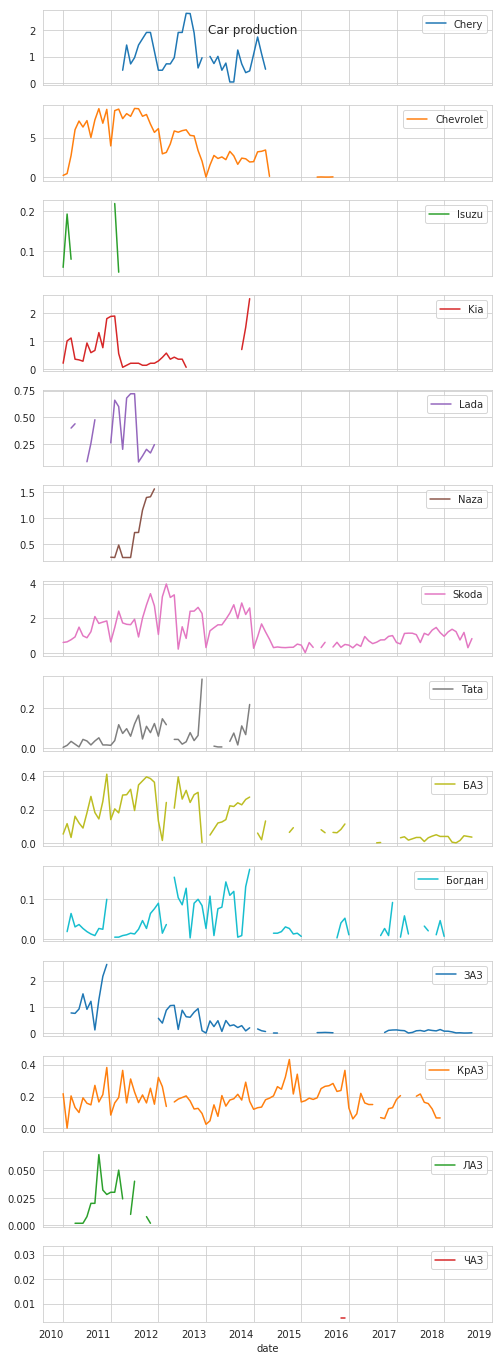

In [12]:
pdf_ukr['date']= pd.to_datetime(pdf_ukr['date'], format='%b-%Y')
pdf_grp=pdf_ukr.groupby([pd.Grouper(key='date', freq='MS'), 'Model'])['Count'].sum()/1e3
pdf_grp.unstack(level=-1).plot.line(subplots=True, figsize=(7, 19), rot=0, title='Car production ')
plt.tight_layout()
plt.show();